<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [187]:
import matplotlib.pyplot as plt

% matplotlib inline

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()
#print(type(boston))

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [189]:
# X and y were concatanated so that EDA can be done on both features and target.
boston_df = pd.concat([X, y], axis = 1)
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [190]:
# Exploratory data analysis.
# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

#print(type(X))
# To tell us if there are any null values. There are none.
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [191]:
# To check the data type of the features.
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [192]:
# To identify how big the data set is.
boston_df.shape

(506, 14)

In [193]:
# To have a quick overview of the basic statistics of each feature.
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [194]:
# To identify uf there are any missing values. There are none.
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [195]:
#number of unique values for each column
boston_df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [196]:
# The data is ready for use. (1) There are no null values. (2) Values are all standardized as floats.
# (3) There seems to be enough unique numbers in the features to start analysis. 

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

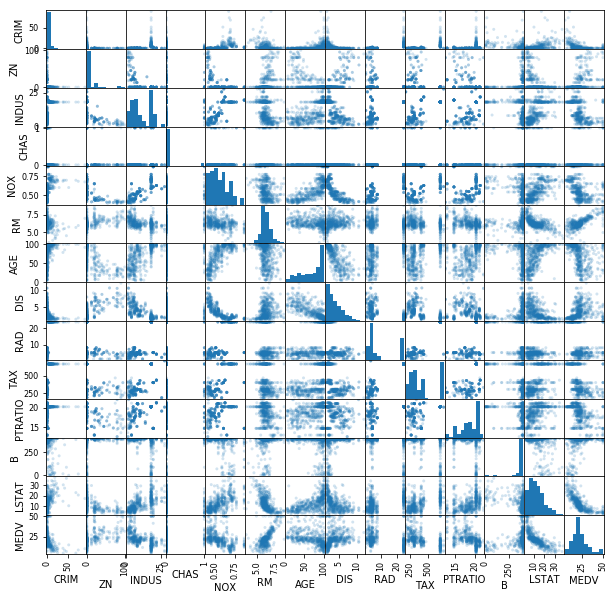

In [197]:
# Or can I just perform a scatter matrix to have a quick overview of the top 3 or 4 factors correlated to MEDV?

scatter_matix = pd.plotting.scatter_matrix(boston_df, alpha=0.2, figsize=(10, 10), diagonal='hist')

In [198]:
# From scatter matrix, features selected by:
# (1) Identifying correlation
# (2) Understand features to see which makes sense. (e.g. Would buyers know air composition in the area?)
# (3) Features with larger variance in values. (e.g. LSTAT vs RAD)
# (4) Plot out selected feature to confirm.

In [199]:
# Features selected: INDUS, RM, PTRATIO, LSTAT

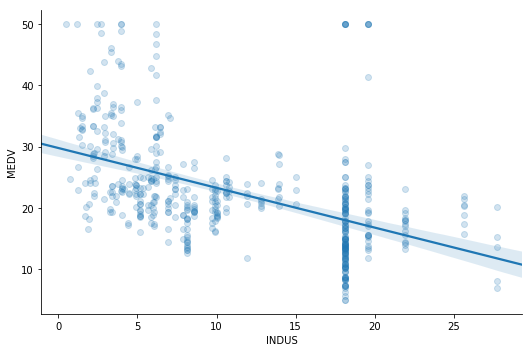

In [200]:
# INDUS: Could signify a blue collar town where workers might not be able to afford expensive housing?

sns.lmplot(x='INDUS', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});

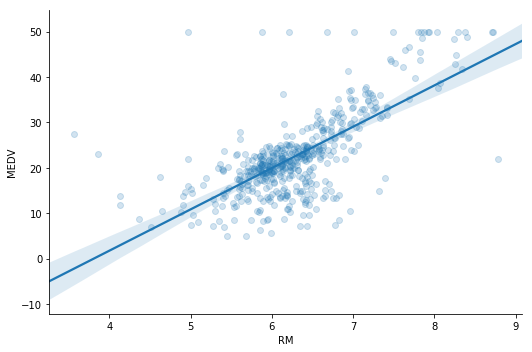

In [201]:
# RM: Intuitive that more rooms would cost more?

sns.lmplot(x='RM', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});

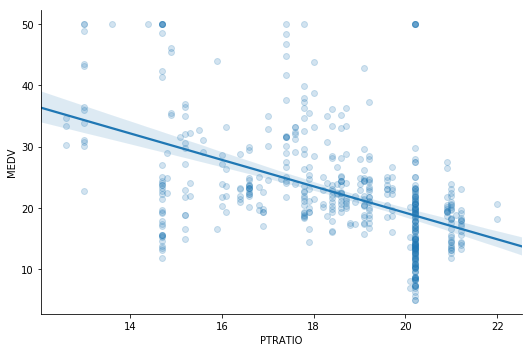

In [202]:
# PTRATIO: Perhaps of importance to young families, or could potentially signify better/private schools?

sns.lmplot(x='PTRATIO', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});

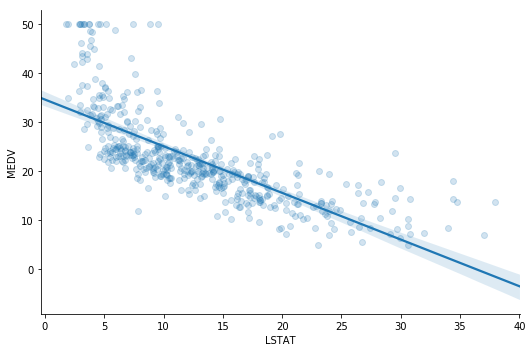

In [203]:
# LSTAT: Lower status (poorer parts of Boston) could bring prices down due to safety concerns, etc.

sns.lmplot(x='LSTAT', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [204]:
# Chosen features: INDUS, RM, PTRATIO, LSTAT

In [205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [206]:
feature_cols = ['INDUS', 'RM', 'PTRATIO', 'LSTAT']

X30 = boston_df[feature_cols]

y30 = y.astype('int')

# 70/30 split
X30_train, X30_test, y30_train, y30_test = train_test_split(X30, y30, random_state=99, test_size = 0.3)

print (X30_train.shape, y30_train.shape)
print (X30_test.shape, y30_test.shape)

y30 = y30.astype('int')

#print (y_train.head())

knn = KNeighborsClassifier(n_neighbors = 8)
# Error starts here
knn.fit(X30_train, y30_train.values.reshape(-1,))

y30_pred_class = knn.predict(X30_test)
print((metrics.accuracy_score(y30_test, y30_pred_class)))

(354, 4) (354, 1)
(152, 4) (152, 1)
0.15789473684210525


In [207]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

#k_range = list(range(1, 101))
#training_error = []
#testing_error = []

#y30 = y30.astype('int')

# Find test accuracy for all values of K between 1 and 100 (inclusive).
#for k in k_range:
    
    # Instantiate the model with the current K value.
#    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X30_train, y30_train)
    
    # Calculate training error (error = 1 - accuracy).
#    y30_pred_class = knn.predict(X30)
#    training_accuracy = metrics.accuracy_score(y30, y30_pred_class)
#    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
#    y30_pred_class = knn.predict(X30_test)
#    testing_accuracy = metrics.accuracy_score(y30_test, y30_pred_class)
#    testing_error.append(1 - testing_accuracy)

# Create a DataFrame of K, training error, and testing error.
#column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
#error_df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
#error_df.head()'''

In [208]:
#error_df.plot(y='testing error');
#plt.xlabel('Value of K for KNN');
#plt.ylabel('Error (lower is better)');

In [209]:
# Find the minimum testing error and the associated K value.
#error_df.sort_values('testing error').head()

In [210]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
#error_df.plot();
#plt.xlabel('Value of K for KNN');
#plt.ylabel('Error (lower is better)');

In [211]:
feature_cols = ['INDUS', 'RM', 'PTRATIO', 'LSTAT']

X10 = boston_df[feature_cols]
#print(type(X))
y10 = boston_df.MEDV

y10 = y10.astype('int')

# 90/10 split
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, random_state=99, test_size = 0.1)

print (X10_train.shape, y10_train.shape)
print (X10_test.shape, y10_test.shape)

#y = y.astype('int')

knn = KNeighborsClassifier(n_neighbors = 1)
# Error starts here
knn.fit(X10_train, y10_train)

y10_pred_class = knn.predict(X10_test)
print((metrics.accuracy_score(y10_test, y10_pred_class)))

(455, 4) (455,)
(51, 4) (51,)
0.1568627450980392


In [212]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

#k_range = list(range(1, 101))
#training_error = []
#testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
#for k in k_range:

    # Instantiate the model with the current K value.
#    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X10_train, y10_train)
    
    # Calculate training error (error = 1 - accuracy).
#    y10_pred_class = knn.predict(X10)
#    training_accuracy = metrics.accuracy_score(y10, y10_pred_class)
#    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
#    y10_pred_class = knn.predict(X10_test)
#    testing_accuracy = metrics.accuracy_score(y10_test, y10_pred_class)
#    testing_error.append(1 - testing_accuracy)

# Create a DataFrame of K, training error, and testing error.
#column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
#df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
#df.head()'''

In [213]:
# Find the minimum testing error and the associated K value.
#df.sort_values('testing error').head()'''

In [214]:
# Using the selected features, using either 70/30 or 90/10 both give high errors. Is model likely to be inaccurate?

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [215]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [216]:
kf = model_selection.KFold(n_splits = 10)

In [217]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 9.30130568733783
R2: 0.7400164016233187

Model 2
MSE: 14.172083740863417
R2: 0.739334030979943

Model 3
MSE: 14.10631148930555
R2: 0.7358548424499288

Model 4
MSE: 35.194794314208934
R2: 0.7366838522448855

Model 5
MSE: 31.9247493081814
R2: 0.7346281227725158

Model 6
MSE: 19.85853693588073
R2: 0.7380658573051555

Model 7
MSE: 9.957920002669926
R2: 0.7392997861456196

Model 8
MSE: 168.53075207495166
R2: 0.6750963155585574

Model 9
MSE: 33.61791833404249
R2: 0.7302142777942902

Model 10
MSE: 10.96654316678143
R2: 0.7395917225446051

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 34.76309150542234
Mean of R2 for all folds: 0.730878520941882


In [218]:
#5 fold:,
#Mean of MSE for all folds: 37.22284363713844
#Mean of R2 for all folds: 0.7154581036096155

#8 fold,
#Mean of MSE for all folds: 32.11355242569478
#Mean of R2 for all folds: 0.7314089823919392

#10 fold,
#Mean of MSE for all folds: 34.76309150542234
#Mean of R2 for all folds: 0.730878520941882'''

# Accuracy does not neccesarily increase with more folds.

# KNN Practice

In [219]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [220]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [221]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [222]:
'''# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

sns.lmplot(x='petal_length', y='petal_width', fit_reg=False, hue='species', data=iris)

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES

sns.lmplot(x='sepal_length', y='sepal_width', fit_reg=False, hue='species', data=iris, )'''

"# Map each iris species to a number\n# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'\n\niris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})\n\n# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES\n\nsns.lmplot(x='petal_length', y='petal_width', fit_reg=False, hue='species', data=iris)\n\n# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES\n\nsns.lmplot(x='sepal_length', y='sepal_width', fit_reg=False, hue='species', data=iris, )"

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [223]:
'''feature_matrix = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_matrix]'''

"feature_matrix = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']\nX = iris[feature_matrix]"

### Create your target vector "y"
This will be the species type.

In [224]:
'''y = iris['species']'''

"y = iris['species']"

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [225]:
'''from sklearn.model_selection import train_test_split

# Using 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = 0.3)'''

'from sklearn.model_selection import train_test_split\n\n# Using 70% train, 30% test\nX_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = 0.3)'

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [226]:
'''from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_1 = KNeighborsClassifier(n_neighbors = 1)'''

'from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn import metrics\n\nknn_1 = KNeighborsClassifier(n_neighbors = 1)'

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [227]:
'''knn_1.fit(X_train, y_train)

#knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

#y_pred_class = knn.predict(X_test)
#print((metrics.accuracy_score(y_test, y_pred_class)))'''

'knn_1.fit(X_train, y_train)\n\n#knn.fit(X_train, y_train)\n\ny_pred_class = knn.predict(X_test)\nprint((metrics.accuracy_score(y_test, y_pred_class)))\n\n#y_pred_class = knn.predict(X_test)\n#print((metrics.accuracy_score(y_test, y_pred_class)))'

### Create a Model With Five Neighbors. Did it Improve?

In [228]:
'''knn_5 = KNeighborsClassifier(n_neighbors = 5)

knn_5.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))'''


'knn_5 = KNeighborsClassifier(n_neighbors = 5)\n\nknn_5.fit(X_train, y_train)\n\ny_pred_class = knn.predict(X_test)\nprint((metrics.accuracy_score(y_test, y_pred_class)))'

In [229]:
# This is no improvement from n_neighbours 1 -> 5?

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [230]:
'''# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)


'''# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.
n_range = list(range(1,101))
train_error = []
test_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for n in n_range:
    
    # Instantiate the model with the current n value.
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)

    # Calculate train error (error = 1 - accuracy).
    y_predict_class = knn.predict(X)
    train_accuracy = metrics.accuracy_score(y, y_pred_class)
    train_error.append(1 - train_accuracy)
    
    # Calculate test error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    test_accuracy = metrics.accuracy_score(y, y_pred_class)
    test_error.append(1 - test_accuracy)'''
    
    
# Create a DataFrame of k, training error, and testing error.
column_dict = {'K': k_range, 'training error':train_error, 'testing error':test_error}
check_accuacy_df = pd.DataFrame(column_dict).set_index('N').sort_index(ascending=False)
check_accuacy_df.head()'''

SyntaxError: invalid syntax (<ipython-input-230-f17ae8a39c3b>, line 51)

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [ ]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))